In [15]:
from gensim import models
ko_model = models.fasttext.load_facebook_model("cc.ko.300.bin.gz")

In [16]:
with open("dataset_train1.txt",'r',encoding="utf-8") as file:
    contents = file.readlines()

In [32]:
dataset = []
for i in contents:
    dataset.append(i.split(" "))

label = []
for i in dataset:
    if "__label__일반\t" in i[0]:   
        i[0] = i[0].replace("__label__일반\t","")
        label.append(0)
    else:
        i[0] = i[0].replace("__label__보이스피싱\t","")
        label.append(1)

In [47]:
x_data = []
for i in dataset:
    input_data = []
    for j in i:
        input_data.append(ko_model.wv[j].tolist())
    x_data.append(input_data)

In [69]:
len(x_data[2][0])

300

In [57]:
label = label.tolist()

In [11]:
print('training...')
model = fasttext.train_supervised(input="dataset_train1.txt", lr=1.0, epoch=100,
                             wordNgrams=5, bucket=200000, dim=300, loss='hs',
                             pretrainedVectors="wiki.ko.vec")

training...


Read 0M words
Number of words:  14027
Number of labels: 2
Progress: 100.0% words/sec/thread:  475219 lr:  0.000000 avg.loss:  0.003699 ETA:   0h 0m 0s


In [12]:
print("총 단어 개수: " + str(len(model.words)))
print("총 레이블 수: " + str(len(model.labels)))
print(model.labels)

총 단어 개수: 882366
총 레이블 수: 2
['__label__일반', '__label__보이스피싱']


In [13]:
def print_results(N, p, r):
    print("N\t" + str(N))
    print("P@{}\t{:.3f}".format(1, p))
    print("R@{}\t{:.3f}".format(1, r))

print_results(*model.test('dataset_test.txt'))
model.test_label('dataset_test.txt')

N	149
P@1	0.497
R@1	0.497


{'__label__보이스피싱': {'precision': 0.4966442953020134,
  'recall': nan,
  'f1score': 0.9932885906040269},
 '__label__일반': {'precision': nan, 'recall': nan, 'f1score': nan}}

In [6]:
model.predict('안녕하세요. 저는 검찰 입니다. 고객님의 계좌에 문제가 생겨 연락드렸습니다. 지금 즉시 은행으로 가서 돈을 인출니다.')

(('__label__보이스피싱',), array([0.99907434]))

In [7]:
model.get_nearest_neighbors('보이스')

[(0.8085024952888489, '보이스터'),
 (0.7997428178787231, '듀보이스'),
 (0.7957881689071655, '풀보이스'),
 (0.7934665679931641, '보이스원'),
 (0.7827650308609009, '보이스코'),
 (0.7765979766845703, '보이스피싱'),
 (0.7715454697608948, '보이스랏가'),
 (0.7708255648612976, '키보이스'),
 (0.7707119584083557, '보이스판'),
 (0.7664067149162292, '보이스오버')]

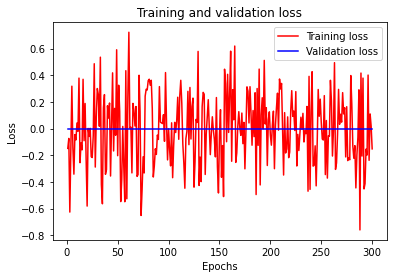

In [8]:
#모델 평가
import matplotlib.pyplot as plt

acc = model['acc']
val_acc = model['val_acc']
loss = model['loss']
val_loss = model['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

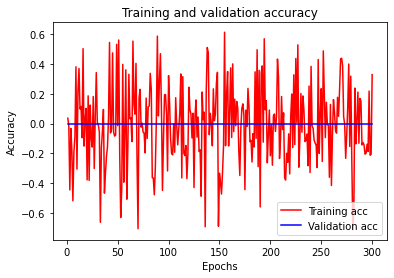

In [9]:
plt.clf()

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [120]:
#모델 저장
model.save_model("model1.bin")